# Report

***
> __Authors__ : Cindy Delage, Hanna Bacave, Yassine Mimouni 

***
> Inspired from :
- Wikipedia : https://en.wikipedia.org/wiki/Logistic_map
- Youtube : https://www.youtube.com/watch?v=ovJcsL7vyrk&app=desktop

## Setting up

In [1]:
import sys
import os
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as p
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib import animation
from numba import jit
from numba import int64
from numba import float64
from numba import jitclass
from scipy.sparse import csr_matrix, isspmatrix
import time
import plotly
import plotly.graph_objects as go
import warnings

%matplotlib notebook

In [2]:
#To see the animations you need to install the package
from logistic_module.LogisticEquation.Visualization import Visualization
from logistic_module.LogisticEquation.Bifurcation import Visualization_bifurcation

In [3]:
df_lm = pd.read_csv("data.csv")

## Introduction 

In order to introduce fractals pedagogically, we realised a questionnaire on the basics (available on https://forms.gle/tYi8BPEvu8F8emz97). So, our introduction will consist to analyse the results to introduce our subject.

The respondents answered at the eleven following questions :

    1/ What do you know about fractals ?
    2/ For you, a fractal is ...
    3/ The logistic map allows to study ...
    4/ Fractals have been introduced by Benoit B. Mandelbrot in ...
    5/ Mandelbrot fractal is defined by the equation ...
    6/ The link between logistic map and Mandelbrot fractal is ...
    7/ The highest dimension to represent fractals is ...
    8/ Mandelbrot set is particular because ...
    9/ In the equation of Mandelbrot set c is ...
    10/ Fractals have been used to ...
    11/ For you, do we know everything about fractals ?
    
On this questions :
    - the first consists in choosing a number on a scale from 0 to 10 indicating the knowledge level on the subject of each,
    -  the others consist in picking between three options the one that seems the most correct. 

First of all, we are going to start by editing the distribution of knowledge level of the respondents. To do this, we will plot the histogram corresponding to the results of question n°1 on which it is possible to change the range which takes the values, the transparency and the standardization of the values.

In [4]:
def hist(n_bins=10, density=True):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.hist(df_lm['What do you know about fractals ?'],
            bins=n_bins, density=density, alpha=1)
    plt.xlabel('Knowledge level')
    plt.ylabel('Proportion')
    plt.title("Histogram of knowledge level of respondent")
    plt.tight_layout()
    plt.show()

In [6]:
interact(hist, n_bins=(1, 50, 1), density=True)

interactive(children=(IntSlider(value=10, description='n_bins', max=50, min=1), Checkbox(value=True, descripti…

<function __main__.hist(n_bins=10, density=True)>

The first question therefore allows us to establish an initial diagnosis: few people know the world of fractals.

Now let's take a closer look at the answers to each question. We propose to cross-tabulate the answer selected in the drop-down menu and the answer to the question "What do you know about fractals ?".

In [7]:
@interact
def crosstab(answer=['For you, a fractal is ...', 'The logistic map allows to study ...', 'Fractals have been introduced by Benoit B. Mandelbrot in ...', 'Mandelbrot fractal is defined by the equation ...', 'The link between logistic map and Mandelbrot fractal is ...', 'The highest dimension to represent fractals is ...', 'Mandelbrot set is particular because ...', 'In the equation of Mandelbrot set c is ...', 'Fractals have been used to ...']):
    return(pd.crosstab(df_lm[answer], df_lm['What do you know about fractals ?'], normalize='index')*100)

interactive(children=(Dropdown(description='answer', options=('For you, a fractal is ...', 'The logistic map a…

For example, in question 2, we observe that most people think that fractals represent an object whose structure is invariant by change of scale, which is the definition proposed by Benoit B. Mandelbrot in 1975 and not in 1871 as can be seen in the results of question 4.

So now that we know what a fractal is, let's focus on the logistic equation and its relationship to the Mandelbrot set. Then, in a second and third part, we represent the Mandelbrot fractal in 2D and 3D. 

## Logistic Map

The logistic map is a sequence defined by the following recurrence formula :
\begin{equation*}
x_{n+1}=rx_n(1−x_n)
\end{equation*}
where :

- r is the growth ratio and is defined and $r \in [0,4]$

- x0 $\in [0,1]$

This sequence allows us to simulate the population growth. Indeed, r is the coefficient by which the increasing of population : x is multiplicated. But, just increasing poluation isn’t realistic, so we introduce the factor 1 - x representing the decrease of it. 
To see the evolution of the logistic map, we focus on the r value. Indeed, we can observe 4 possible characteristic behaviors according to the value of r :

- when $r \in [0,1]$ the population will die, so $x_n \longrightarrow 0$ ;

- when $r \in ]1,3[$  the population will approach the value $\frac{r-1}{r}$ ;

- when $r \in [3, 3.56995[$ the population will oscillate between two values ;

- when $r \geq 3.56995$ the population will be chaotic ;


To see it, we create an interactive plot to visualize the evolution of the logistic map with differents values of r.The starting point is fixed equal to $0.9$, and the number of iteations is fixed equal to $10$. Let's play !

In [11]:
def logistic(r, x):
    return r*x*(1-x)


def affichage_interactif(r, x0, n):
    fig, ax = plt.subplots(1, 1, figsize=(7, 5), sharey=True)
    t = np.linspace(0, 1, n)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'b', lw=2)

    x = x0

    for i in range(n):
        y = logistic(r, x)
        ax.plot([x, x], [x, y], 'r', lw=1)
        ax.plot([x, y], [y, y], 'r', lw=1)
        ax.plot([x], [y], 'ok', ms=10)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"Plotting the logistic map with $r={r:.1f}, \, x_0={x0:.1f}$")


interactive(affichage_interactif, {'manual': True}, r=(
    0, 4, 0.1), x0=fixed(0.9), n=fixed(10))

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0), Button(description='Run Interact', sty…

Besides, it is possible to see more with an animation showing the evolution of the logistic map for r between 0 and 4.

<IPython.core.display.Javascript object>


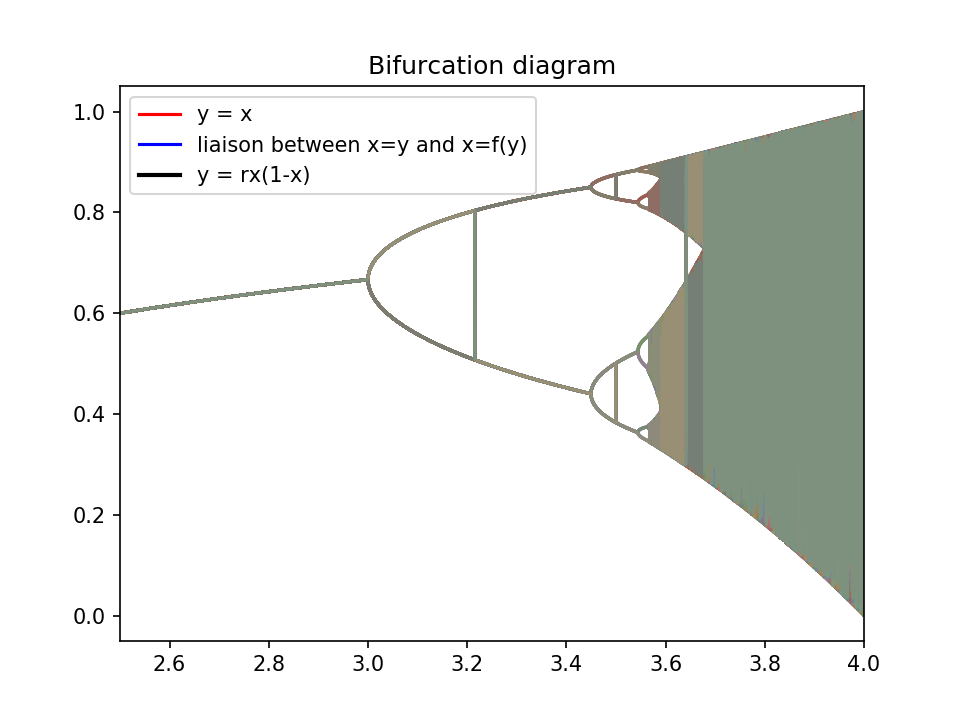

C:\Users\hbaca\anaconda3\lib\site-packages\logistic_module\LogisticEquation\Visualization.py:88: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.
  plt.show(animation.FuncAnimation(self.fig, self.__animate, init_func=self.__init,frames=self.frames, interval=self.equation.n))


In [14]:
viz = Visualization()
viz.start_animation()

Once we have been able to see the phenomenon from the inside, we wish to make a general representation of it. 
To do this, we will draw the bifurcation diagram which makes it possible to make the link between a normal evolution of the population and chaos.

In [16]:
bif = Visualization_bifurcation()
bif.bifurcation_diagram()

## The Mandelbrot set in 2D

In [ ]:
%matplotlib notebook

Comment: In this part, a full study of the time for the code produced is provided (one at every plot). You can also see this study by using yourself the functions of this module. Besides, using yourself the functions will allow you to see the study of the memory footprint of the code.

The Logistic equation is linked to the Mandelbrot set, but before we highlight this link, we should have an interest in the Mandelbrot set itself. This set is defined as the assembly of points c in the complex plan for which the sequence of complex number defined by:


\begin{cases}
z_0=0\\
z_{n+1}=z_n^2+c
\end{cases}


is bounded. We can see the Mandelbrot set as a matrix of 1 and 0, 1 meaning that c is not bounded and 0 meaning that it is bounded. It is in fact a sparse matrix, as we prove it in the file test_logistic_module. With plt.imshow, we can plot this set:

In [ ]:
spec = [('largeur', int64),
        ('hauteur', int64),
        ('max_iteration', int64),
        ('xmin', float64), ('xmax', float64), ('ymin', float64), ('ymax', float64),
        ('array', int64[:, :]), ]


@jitclass(spec)
class Mandelbrot_2D:

    def __init__(self, largeur, hauteur, max_iteration,  xmin, xmax, ymin, ymax):
        self.largeur = largeur
        self.hauteur = hauteur
        self.max_iteration = max_iteration
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax

    @property
    def Mandelbrotset(self):
        self.array = np.zeros((self.hauteur, self.largeur), dtype=int64)
        for x in range(self.hauteur):
            cx = (x * (self.xmax - self.xmin) / self.hauteur + self.xmin)
            for y in range(self.largeur):
                cy = (y * (self.ymin - self.ymax) / self.largeur + self.ymax)
                xn, yn, n = 0, 0, 0
                while (xn**2 + yn**2) < 4 and n < self.max_iteration:
                    tmp_x, tmp_y = xn, yn
                    xn = tmp_x**2 - tmp_y**2 + cx
                    yn = 2 * tmp_x * tmp_y + cy
                    n = n + 1
                if n < self.max_iteration:
                    self.array[y, x] = 1
        return self.array


start = time.time()
Z = Mandelbrot_2D(hauteur=500, largeur=500, max_iteration=100,
                  xmin=-2, xmax=0.5, ymin=-1.25, ymax=1.25)

In [ ]:
%matplotlib notebook
fig = plt.figure()
fig.suptitle("Mandelbrotset")
plt.imshow(Z.Mandelbrotset, cmap="magma")
plt.colorbar()
plt.show()
end = time.time()
print("Time spent to print the Mandelbrotset:  {0:.5f} s.".format(end - start))

This picture represents the set as we see it most of the time, but changing the arguments in the function can make it a little different. We can already see it, but the set is a fractal: we can see a dozen of mini-Mandelbrot surrounding the big one, but zooming on the set makes it more obvious: let's first make a little zoom on the left of the picture:

In [ ]:
Z_1 = Mandelbrot_2D(500, 500, 600, -2, 0.5, -1.25, 1.25)
Z_2 = Mandelbrot_2D(500, 500, 600, -1.7, 0.2, -0.95, 0.95)
Z_3 = Mandelbrot_2D(500, 500, 600, -1.5, 0, -0.75, 0.75)
Z_4 = Mandelbrot_2D(500, 500, 600, -1.5, -0.35, -0.57, 0.57)
Z_5 = Mandelbrot_2D(500, 500, 600, -1.44, -0.72, -0.4, 0.4)
Z_6 = Mandelbrot_2D(500, 500, 600, -1.42, -0.98, -0.2, 0.2)
Z_7 = Mandelbrot_2D(500, 500, 600,  -1.42, -1.23, -0.1, 0.09)
Z_8 = Mandelbrot_2D(500, 500, 600, -1.41886, -1.27142, -0.0961, 0.08658)
Z_9 = Mandelbrot_2D(500, 500, 600, -1.41, -1.3366, -0.05, 0.05)

start_1 = time.time()
fig, ax = plt.subplots(1, 1, figsize=(12, 6),
                       sharey=True)
im = plt.imshow(Z_1.Mandelbrotset, cmap='magma')


def animate(i):
    if i == 0:
        im = plt.imshow(Z_2.Mandelbrotset, cmap='magma')
    if i == 1:
        im = plt.imshow(Z_3.Mandelbrotset, cmap='magma')
    if i == 2:
        im = plt.imshow(Z_4.Mandelbrotset, cmap='magma')
    if i == 3:
        im = plt.imshow(Z_5.Mandelbrotset, cmap='magma')
    if i == 4:
        im = plt.imshow(Z_6.Mandelbrotset, cmap='magma')
    if i == 5:
        im = plt.imshow(Z_7.Mandelbrotset, cmap='magma')
    if i == 6:
        im = plt.imshow(Z_8.Mandelbrotset, cmap='magma')
    if i == 7:
        im = plt.imshow(Z_9.Mandelbrotset, cmap='magma')


plt.colorbar()
fig.suptitle("Mandelbrot fractal")
anim = animation.FuncAnimation(
    fig, animate, frames=np.arange(15), interval=400, blit=False)
end_1 = time.time()
plt.show()
print("Time spent to animate the zoom on the Mandelbrotset:  {0:.5f} s.".format(
    end_1 - start_1))

If this zoom is efficient to see the auto-similarity in the set, it is not enough to see the inside of the set, where we can obviously see many others mini-Mandelbrot but also different types of patterns, that became famous thanks to many studies on this set. We will make an over zoom on the set, to see it from the inside and to see some of these patterns. Let us begin with a simple zoom inside the set, just to see what it looks like: 

In [ ]:
start_2 = time.time()
fig, ax = plt.subplots(1, 1, figsize=(12, 6),
                       sharey=True)
fig.suptitle("Mini-mandelbrots")
Z = Mandelbrot_2D(500, 500, 50, -2, 0.5, -1.25, 1.25)
im = plt.imshow(Z.Mandelbrotset, cmap='magma')


def animate_200(i):
    if i <= 50:
        Z = Mandelbrot_2D(500, 500, 50, -2+0.02*i, 0.5 -
                          0.02*i, -1.25+0.02*i, 1.25-0.02*i)
        im.set_data(Z.Mandelbrotset)
    if i > 50 and i <= 130:
        Z_1 = Mandelbrot_2D(500, 500, 200, -1+0.0026*(i-50), -0.5 -
                            0.0021*(i-50), -0.25+0.0044*(i-50), 0.25-0.0003*(i-50))
        im.set_data(Z_1.Mandelbrotset)
    if i > 130:
        Z_2 = Mandelbrot_2D(500, 500, 600, -0.74+0.00044*(i-150), -0.71 -
                            0.00008*(i-150), 0.19+0.00046*(i-150), 0.22-0.00006*(i-150))
        im.set_data(Z_2.Mandelbrotset)


anim = animation.FuncAnimation(
    fig, animate_200, frames=np.arange(0, 210, 1), interval=1, blit=True)
plt.show()
end_2 = time.time()
print("Time spent to animate the zoom inside the Mandelbrotset:  {0:.5f} s.".format(
    end_2 - start_2))

This zoom makes it clearer that we are facing a fractal. It also shows a spiral form, that is one of the famous patterns we already talked about: in fact, we can see different spiral patterns in the set, with different numbers of spirals. The one we are going to see now is named "Triple spiral valley": to find the right setting of the arguments, we need to zoom little by little. A useful way to make it is to print several sparse matrix, each being a zoom of the precedent one.

In [ ]:
start_3 = time.time()
fig, ax = plt.subplots(1, 2)
# We start using the Mandelbrotset without any zoom:
Z = Mandelbrot_2D(500, 500, 100, -2, 0.5, -1.25, 1.25)
ax[0].imshow(Z.Mandelbrotset, cmap='magma')
# It allows us to find new values for xmin, ymin, xmax and ymax so that we obtain a first zoom:
Z = Mandelbrot_2D(500, 500, 600, -0.057, -0.075, 0.6435, 0.6544)
ax[1].imshow(Z.Mandelbrotset, cmap='magma')
# This matrix is a sparse one
isspmatrix(csr_matrix(Z.Mandelbrotset))
# It is useful to zoom again, with more precise values of xmin, ymin, xmax and ymax:
fig = plt.figure()
Z = Mandelbrot_2D(500, 500, 600, -0.069, -0.0669, 0.6478, 0.6490)
plt.imshow(Z.Mandelbrotset, cmap='magma')
plt.title("Triple spiral valley")
end_3 = time.time()
print("Time spent to plot a characteristic pattern:  {0:.5f} s.".format(
    end_3 - start_3))

An over famous pattern is named "Elephant valley", because of its shape like an elephant trunk :

In [ ]:
start_3 = time.time()
fig, ax = plt.subplots(1, 2)
Z = Mandelbrot_2D(500, 500, 600, 0.25, 0.30, -0.01,
                  0.04)  # An over sparse matrix
isspmatrix(csr_matrix(Z.Mandelbrotset))
ax[0].imshow(Z.Mandelbrotset, cmap='magma')
Z = Mandelbrot_2D(500, 500, 600, 0.2615, 0.2634,
                  0.0018, 0.003)  # Sparse matrix again
ax[1].imshow(Z.Mandelbrotset, cmap='magma')
# Second plot of a characteristic pattern:
fig = plt.figure()
Z = Mandelbrot_2D(500, 500, 600, 0.26185, 0.26196, 0.002515, 0.002573)
plt.imshow(Z.Mandelbrotset, cmap='magma')
plt.title("Elephant valley")
end_3 = time.time()
print("Time spent to plot a characteristic pattern:  {0:.5f} s.".format(
    end_3 - start_3))

On the last picture, all of the one spiral shapes are in fact elephants valleys, you can see one at the coordinates (100,250) for example, or at the bottom left corner of the picture. We could have presented much more famous patterns, as the Seahorse valley, the scepter valley or even the Julia set, but it was not the main purpose of this project. The 3D plot of the set will allow us to highlight the link between the logistic equation and the Mandelbrot set.

## Mandelbrot set in 3D

In this part, we will highlight how the Mandelbrot set is linked with the bifurcation diagram.  
To make this link obvious, we need to visualize the Mandelbrot set in 3D.  

In [ ]:
warnings.filterwarnings("ignore")

First, we set the square area we will observe with the $\text{grid}$ function below.  
It is made in a way that it shows the points that are parts of the Mandelbrot set.  
  
The idea behind this 3D visualization is to plot the $z_n$ terms of the Mandelbrot equation : $z_{n+1}=z_n^2+c$ along the z-axis.  
In the mand function, we will make n iterations of the equation for each element of a square matrix Z then plot this matrix in 3D.  
  
But to have a good enough representation, it needed a lot of iteration to see visible differences in height between each points making the calculation time too expensive.  
  
A way to get around this problem was to apply a non-linear elevation function to each terms to exacerbate the height difference in a short amount of time.  
That is the role of the function $\exp(-\lvert Z \rvert)$ in the $\text{mand}$ function below.  
At last a filter is applied in the main cardioid zone to make up for the unwanted exaggerate elevation.  
  
Finally, by using Plotly, an interactive 3D representation of the Mandelbrot set is made in the $\text{interact}$ function with visuals parameters  highlighting what we want to observe.

In [ ]:
class Mand_3D():

    def __init__(self, n, M, L, dx, dy):

        self.n = n
        self.M = M
        self.L = L
        self.dx = dx
        self.dy = dy

    def grid(self):

        x = np.linspace(-self.L+self.dx, self.L+self.dx, self.M)
        y = np.linspace(-self.L+self.dy, self.L+self.dy, self.M)
        X, Y = np.meshgrid(x, y)
        return X, Y

    def mand(self):

        X, Y = self.grid()
        C = X + 1j*Y
        Z = C
        for k in range(1, (self.n)+1):
            ZZ = Z**2 + C
            Z = ZZ
        W = np.e**(-np.abs(Z)) - 0.625
        W[W > 0] = W[W > 0]*0.0001
        return W

    def interact(self):

        fig = go.Figure(data=[go.Surface(z=self.mand(), x=self.grid()[0], y=self.grid()[1],
                                         colorscale='Reds',
                                         showscale=False,
                                         connectgaps=False,
                                         hoverinfo="none",
                                         contours=dict(x=dict(highlight=False),
                                                       y=dict(highlight=False,
                                                              show=True,
                                                              start=-2,
                                                              end=2,
                                                              size=1,
                                                              color="yellow"),
                                                       z=dict(highlight=False))),

                              go.Surface(z=-self.mand(), x=self.grid()[0], y=self.grid()[1],
                                         colorscale='Reds',
                                         reversescale=True,
                                         showscale=False,
                                         connectgaps=False,
                                         hoverinfo="none",
                                         showlegend=False,
                                         contours=dict(x=dict(highlight=False),
                                                       y=dict(highlight=False,
                                                              show=True,
                                                              start=-2,
                                                              end=2,
                                                              size=1,
                                                              color="yellow"),
                                                       z=dict(highlight=False)))],

                        layout=go.Layout(title='Mandelbrot 3D interactive visualization',
                                         width=600,
                                         height=600,
                                         hovermode='closest',
                                         template="plotly_dark",
                                         scene=dict(xaxis=dict(visible=False),
                                                    yaxis=dict(visible=False),
                                                    zaxis=dict(visible=False),
                                                    hovermode=False,
                                                    camera=dict(eye=dict(x=0, y=-0.8, z=2.5)))))

        return fig

We initialize the parameters for the visualization.  
Reminder :  
    $\text{n}$ is the number of iteration of the Mandelbrot equation  
    $\text{M}$ is the size of the Z square matrix thus the number of element is $\text{M}^2$  
    $\text{L, dx, dy}$ set the size of the square area observed 

In [ ]:
n = 200
M = 200
L = 1.4
dx = -0.6
dy = 0

fig = Mand_3D(n, M, L, dx, dy)

By looking at the figure from the side we can observe that all the values in the main cardioid end up by concentrating onto a single constant value as shown with the yellow line on the figure.  
  
Then, the values on the main bulb start to oscillate between two values provoking the bifurcation in two ways.  
  
We can recognize the beginning of the bifurcation diagram, with more (way more) iterations we could see the bifurcation in 2 ways at the extremity of the two bulbs and so on till the chaotic part.  
(Not recommanded to go past 1000 iterations)

In [ ]:
start = time.time()

fig.interact().show()

end = time.time()
print("Time spent to modelize the Mandelbrot set in 3D:  {0:.5f} s.".format(
    end - start))

In the following, an animation of the rotation of the figure is made in order to show automatically the link with the bifurcation.  

Unfortunately, Plotly can't be used to make gif at the moment so the final gif was made using the result of the $\text{animation}$ function below and an extern program (ScreenToGif).

In [ ]:
def animation(mand):

    anim = mand.interact()

    updatemenus = [dict(type='buttons',
                        showactive=True,
                        y=1,
                        x=0.8,
                        xanchor='left',
                        yanchor='bottom',
                        pad=dict(t=45, r=10),
                        buttons=[dict(label='Play',
                                      method='animate',
                                      args=[None, dict(frame=dict(duration=5, redraw=True),
                                                       transition=dict(
                                          duration=0, easing='linear'),
                                          fromcurrent=True,
                                          mode='immediate'
                                      )])])]

    anim.update_layout(updatemenus=updatemenus, title='Mandelbrot 3D rotation')
    anim.update_traces(go.Surface(contours=dict(y=dict(highlight=False,
                                                       show=True,
                                                       start=-2,
                                                       end=2,
                                                       size=1,
                                                       color="yellow"))))

    frames = []

    xt = 0
    yt = -0.8
    zt = 2.5

    for t in range(10):
        xt = xt
        yt = yt - 0.08
        zt = zt - 0.1
        frames.append(go.Frame(layout=dict(
            scene_camera_eye=dict(x=xt, y=yt, z=zt))))

    anim.frames = frames

    return anim

In [ ]:
animation(fig)

## Conclusion 

Once the link between the logistic sequence and the Mandelbrot fractals was made using the bifurcation diagram, we were able to explore them. To do this, we explored its general appearance, its forms and its specificities. Finally, we were able to view it in 3D. 